# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [3]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [4]:
df.head(3)

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [5]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [6]:
# creating subset of data for time sake. 4M --> 10K
## train/test split --> bigger training set than test set

N_Train=10000
M_Train=len(df["signal"])-10000

Train_Sample=df[:N_Train]
Test_Sample=df[M_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [7]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

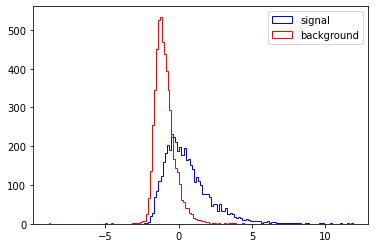

In [8]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

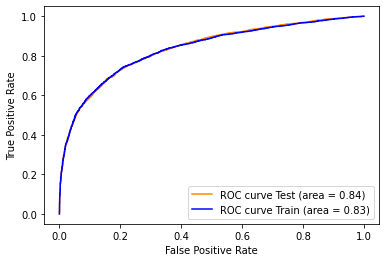

In [9]:
import sklearn.metrics as MET
from sklearn.metrics import roc_curve, auc

#test
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)

#train
fpr_TR, tpr_TR, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))
roc_auc_TR = auc(fpr_TR, tpr_TR)

# compare plot of roc curves
plt.plot(fpr,tpr, color="darkorange",label="ROC curve Test (area = %0.2f)" % roc_auc)
plt.plot(fpr_TR,tpr_TR, color="blue",label="ROC curve Train (area = %0.2f)" % roc_auc_TR)
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()
# after curve was plotted, insignificant difference was found

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [10]:
RawNames=["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

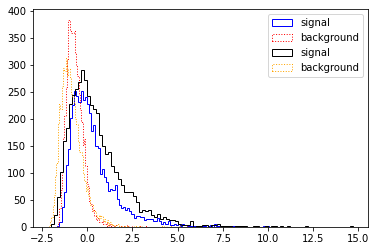

In [12]:
## create training sets for plots
# training set for RawNames
df_RAW_X=Train_Sample[RawNames[1:]]
df_RAW_Y=Train_Sample["signal"]

# training set for FeatureNames
df_FE_X=Train_Sample[FeatureNames[1:]]
df_FE_Y=Train_Sample["signal"]


# RawNames plot
Fisher.fit(df_RAW_X,df_RAW_Y) # train
plt.hist(Fisher.decision_function(Test_sig[RawNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[RawNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True, linestyle='dotted')
plt.legend(loc='upper right')

# FeatureNames plot
Fisher.fit(df_FE_X,df_FE_Y) # train
plt.hist(Fisher.decision_function(Test_sig[FeatureNames[1:]]),bins=100,histtype="step", color="black", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[FeatureNames[1:]]),bins=100,histtype="step", color="orange", label="background",stacked=True, linestyle='dotted')
plt.legend(loc='upper right')

plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [15]:
## part a

# Linear Discriminant Analysis
import sklearn.discriminant_analysis as DA

# Support vector machine: Classification
from sklearn import svm

# Stochastic Gradiant Descent: Classification
from sklearn.linear_model import SGDClassifier

## part b
def classifier(clf, df_RAW_X, df_RAW_Y, df_FE_X, df_FE_Y, X_Train, y_Train, test_sig, Test_bkg):
    plt.figure()

    # Raw Names plot
    clf.fit(df_RAW_X,df_RAW_Y) # train
    plt.hist(clf.decision_function(Test_sig[RawNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.hist(clf.decision_function(Test_bkg[RawNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')

    # FeatureNames plot
    clf.fit(df_FE_X,df_FE_Y)
    plt.hist(clf.decision_function(Test_sig[FeatureNames[1:]]),bins=100,histtype="step", color="black", label="signal",stacked=True)
    plt.hist(clf.decision_function(Test_bkg[FeatureNames[1:]]),bins=100,histtype="step", color="orange", label="background",stacked=True, linestyle='dotted')
    plt.legend(loc='upper right')

    plt.show()

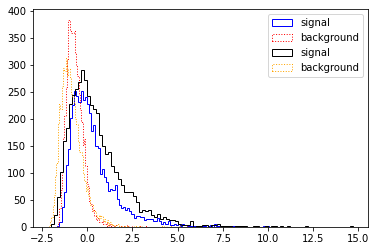

In [17]:
## part b: Linear Discriminant Analysis (LDA)
Fisher=DA.LinearDiscriminantAnalysis()
classifier(Fisher, df_RAW_X, df_RAW_Y, df_FE_X, df_FE_Y, X_Train, y_Train, Test_sig, Test_bkg)

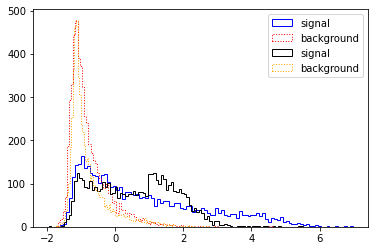

In [19]:
## part b: Support vector machine: Classification (SVC)
clf = svm.SVC()
classifier(clf, df_RAW_X, df_RAW_Y, df_FE_X, df_FE_Y, X_Train, y_Train, Test_sig, Test_bkg)

# seems to be the best method for training

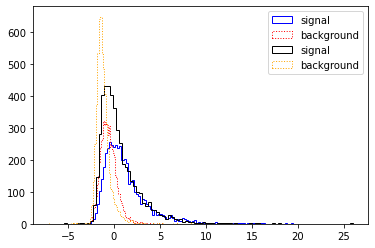

In [16]:
## part b: Stochastic Gradiant Descent: Classification (SGD-C)
clf = SGDClassifier(loss="hinge", penalty="l2")
classifier(clf, df_RAW_X, df_RAW_Y, df_FE_X, df_FE_Y, X_Train, y_Train, Test_sig, Test_bkg)

In [20]:
## part c

# correction: from lab 7
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
    
def compare_significance(df_sig, df_bkg,
                         TPR,FPR, bins_sig,
                         scenarios,bins=100,log=False, ret_xc=False, sel=1):
    
    max_sigs=dict()
    table=list()
    sigs_maxi=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        sigs_maxi.append(sig[max_i])
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'max sig','x_c',"bin i"])))
    return sigs_maxi

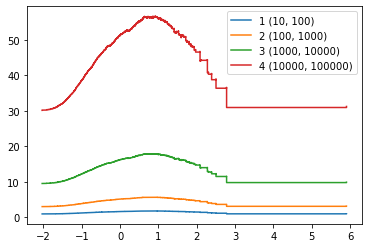

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',max sig,x_c,bin i
1,10,100,0.475142,0.0227189,4.75142,2.27189,1.79288,0.914586,217
2,100,1000,0.475142,0.0227189,47.5142,22.7189,5.6696,0.914586,217
3,1000,10000,0.475142,0.0227189,475.142,227.189,17.9288,0.914586,217
4,10000,100000,0.475142,0.0227189,4751.42,2271.89,56.696,0.914586,217


In [25]:
# using method SVC
clf = svm.SVC()
clf.fit(X_Train,y_Train)

fpr, tpr, _ = roc_curve(y_Test, clf.decision_function(X_Test)) 
_=compare_significance(Test_sig, Test_bkg, tpr[1:], fpr[1:], _, scenarios)

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [24]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# problem with variables passed in fit

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- MET
- MET_phi
- axial_MET
- l_1_eta
- l_1_pT
- ...



#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [36]:
predictions=list()
for x in clf.decision_function(X_Test): predictions.append(1 if x>0 else 0)


def compare_significance(df_sig, df_bkg,
                         TPR,FPR, bins_sig,
                         scenarios, bins=100,log=False, ):
    
    max_sigs=dict()
    table=list()
    sigs_maxi=list()

    # ML model table
    predictions=list()
    for x in clf.decision_function(X_Test): predictions.append(1 if x>0 else 0)
    
    precision = precision_score(y_Test, predictions) # Precision

    accuracy = accuracy_score(y_Test, predictions) # Accuracy

    recall = recall_score(y_Test, predictions) # Recall Score

    f1 = f1_score(y_Test, predictions) # F1 Score
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        sigs_maxi.append(sig[max_i])
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i, 
                     precision, accuracy, recall, f1)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'max sig','x_c',"bin i",
                                           "Precision", 'Accuracy', 'Recall', 'F1 Score'])))
    return sigs_maxi

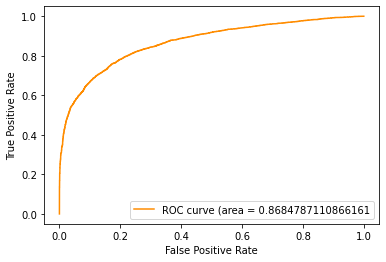

In [35]:
fpr, tpr, _ = roc_curve(y_Test, clf.decision_function(X_Test)) 

f_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label=f'ROC curve (area = {f_auc}')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()